In [2]:
# --- Project Setup ---
from setup_notebook import setup_project_root
setup_project_root()


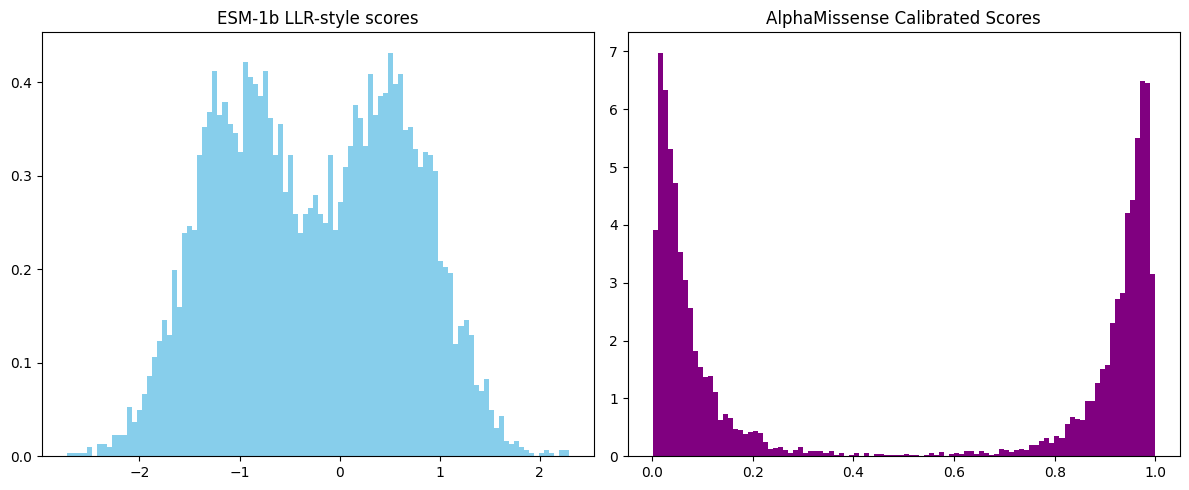

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate ESM-1b style LLR: soft unimodal or bimodal
llr_scores = np.concatenate([
    np.random.normal(loc=-1, scale=0.5, size=3000),
    np.random.normal(loc=0.5, scale=0.5, size=3000)
])

# Simulate AlphaMissense raw classifier outputs (before sigmoid)
classifier_outputs = np.concatenate([
    np.random.normal(loc=-3, scale=1.0, size=3000),
    np.random.normal(loc=3, scale=1.0, size=3000)
])

# Convert classifier outputs to probabilities via sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))
calibrated = sigmoid(classifier_outputs)

# Plot both
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(llr_scores, bins=100, density=True, color='skyblue')
plt.title("ESM-1b LLR-style scores")

plt.subplot(1, 2, 2)
plt.hist(calibrated, bins=100, density=True, color='purple')
plt.title("AlphaMissense Calibrated Scores")

plt.tight_layout()
plt.show()


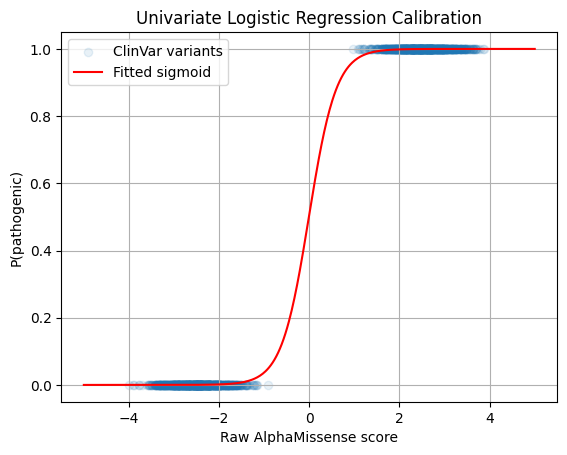

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Simulated raw scores from AlphaMissense
np.random.seed(0)
x_pathogenic = np.random.normal(loc=2.5, scale=0.5, size=1000)
x_benign = np.random.normal(loc=-2.5, scale=0.5, size=1000)

x = np.concatenate([x_pathogenic, x_benign]).reshape(-1, 1)
y = np.array([1]*1000 + [0]*1000)

# Fit logistic regression
model = LogisticRegression()
model.fit(x, y)

# Plot
x_range = np.linspace(-5, 5, 500).reshape(-1, 1)
probs = model.predict_proba(x_range)[:, 1]

plt.scatter(x, y, alpha=0.1, label='ClinVar variants')
plt.plot(x_range, probs, color='red', label='Fitted sigmoid')
plt.title('Univariate Logistic Regression Calibration')
plt.xlabel('Raw AlphaMissense score')
plt.ylabel('P(pathogenic)')
plt.legend()
plt.grid(True)
plt.show()


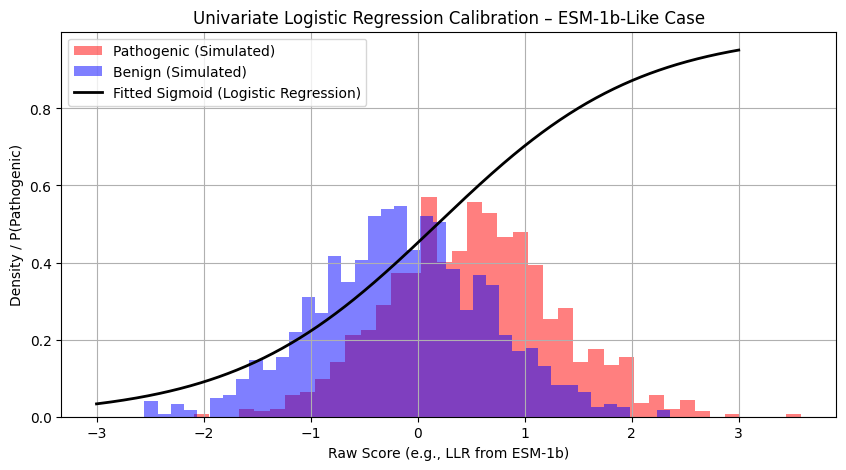

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Simulated overlapping raw scores (like ESM-1b log-likelihood ratios)
np.random.seed(42)
x_pathogenic = np.random.normal(loc=0.5, scale=0.8, size=1000)
x_benign = np.random.normal(loc=-0.2, scale=0.8, size=1000)

x = np.concatenate([x_pathogenic, x_benign]).reshape(-1, 1)
y = np.array([1]*1000 + [0]*1000)

# Fit logistic regression
model = LogisticRegression()
model.fit(x, y)

# Plot sigmoid and data
x_range = np.linspace(-3, 3, 500).reshape(-1, 1)
probs = model.predict_proba(x_range)[:, 1]

plt.figure(figsize=(10, 5))
plt.hist(x_pathogenic, bins=40, alpha=0.5, label="Pathogenic (Simulated)", density=True, color='red')
plt.hist(x_benign, bins=40, alpha=0.5, label="Benign (Simulated)", density=True, color='blue')
plt.plot(x_range, probs, color='black', label="Fitted Sigmoid (Logistic Regression)", linewidth=2)

plt.title("Univariate Logistic Regression Calibration – ESM-1b-Like Case")
plt.xlabel("Raw Score (e.g., LLR from ESM-1b)")
plt.ylabel("Density / P(Pathogenic)")
plt.legend()
plt.grid(True)
plt.show()
